In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pip install -q ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
bike_sharing = fetch_ucirepo(id=275) 
  
# data (as pandas dataframes) 
X = bike_sharing.data.features 
y = bike_sharing.data.targets 

In [4]:
#count of total rental bikes including both casual and registered
y.head()

,cnt
0,16
1,40
2,32
3,13
4,1


In [5]:
#dropar variáveis que nao serao testadas
X = X.drop(columns=["dteday", "atemp"])

In [6]:
#Tem um dicionário no site: https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset
X.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed
0,1,0,1,0,0,6,0,1,0.24,0.81,0.0
1,1,0,1,1,0,6,0,1,0.22,0.80,0.0
2,1,0,1,2,0,6,0,1,0.22,0.80,0.0
3,1,0,1,3,0,6,0,1,0.24,0.75,0.0
4,1,0,1,4,0,6,0,1,0.24,0.75,0.0


In [7]:
print(X.nunique())
X.info()

season         4
yr             2
mnth          12
hr            24
holiday        2
weekday        7
workingday     2
weathersit     4
temp          50
hum           89
windspeed     30
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   yr          17379 non-null  int64  
 2   mnth        17379 non-null  int64  
 3   hr          17379 non-null  int64  
 4   holiday     17379 non-null  int64  
 5   weekday     17379 non-null  int64  
 6   workingday  17379 non-null  int64  
 7   weathersit  17379 non-null  int64  
 8   temp        17379 non-null  float64
 9   hum         17379 non-null  float64
 10  windspeed   17379 non-null  float64
dtypes: float64(3), int64(8)
memory usage: 1.5 MB


In [39]:
X.describe()

,season,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,variavel_inter_temp
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.627229,0.190098,0.309129
std,1.106918,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.192930,0.122340,0.145062
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000
25%,2.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.480000,0.104500,0.182000
50%,3.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.630000,0.194000,0.299200
75%,3.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.780000,0.253700,0.429000
max,4.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,0.850700,0.623000


In [8]:
#Nao tenho certeza como eles classificaram. 4 é o melhor? nunca saberemos
X["weathersit"].unique()

array([1, 2, 3, 4])

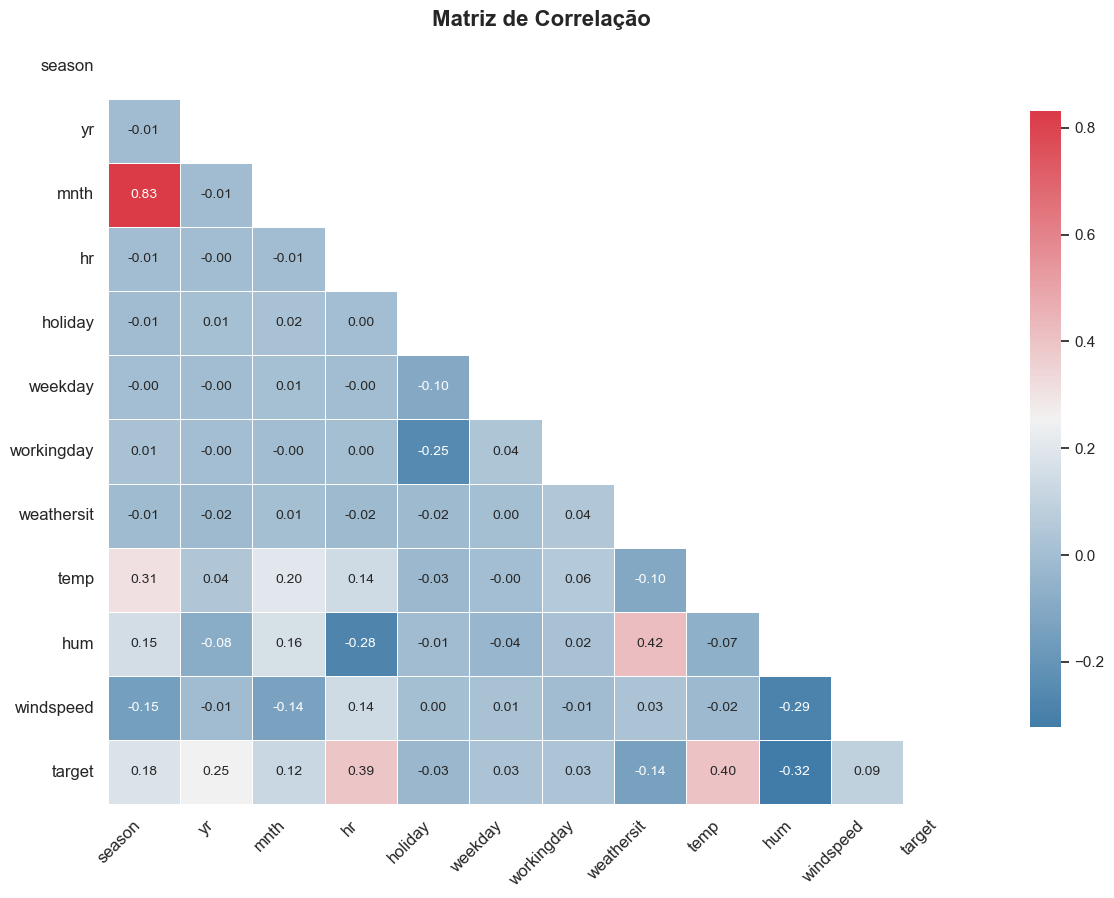

In [9]:
#Analise de multicolineariedade: season e mnth são muito correlacionados, vou tirar mnth da analise

correl = X
correl["target"] = y
matriz = correl.corr()

plt.figure(figsize=(14, 10))
sns.set_theme(style="white")  
mask = np.triu(np.ones_like(matriz, dtype=bool)) 
cmap = sns.diverging_palette(240, 10, as_cmap=True)  

sns.heatmap(
    matriz,
    mask=mask, 
    annot=True,
    fmt=".2f",
    cmap=cmap,
    linewidths=0.7,
    cbar_kws={"shrink": 0.8}, 
    annot_kws={"size": 10}  
)

plt.title("Matriz de Correlação", fontsize=16, fontweight="bold")
plt.xticks(fontsize=12, rotation=45, ha="right")  
plt.yticks(fontsize=12)
plt.show()

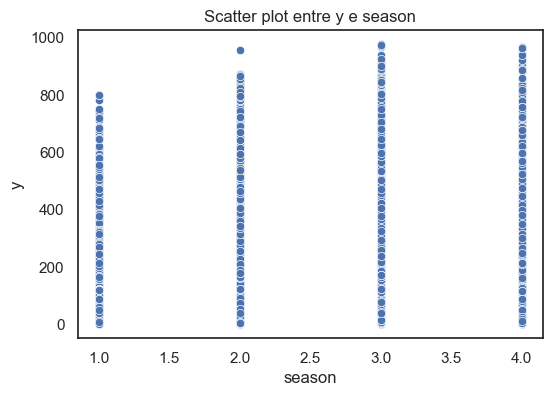

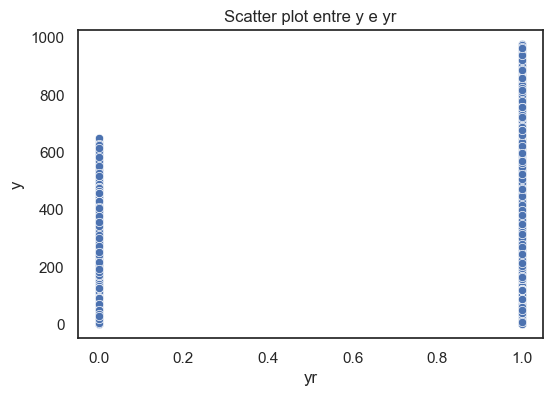

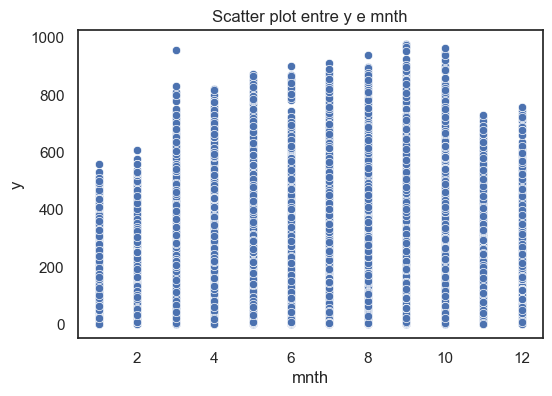

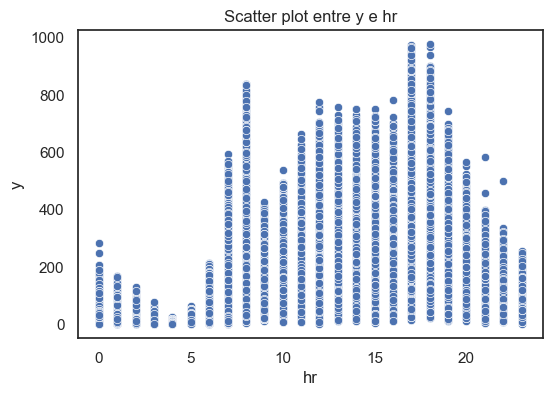

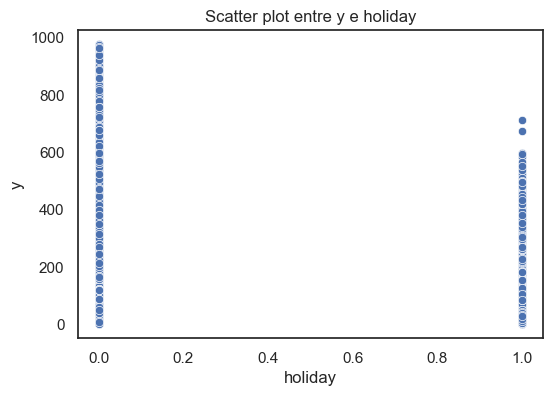

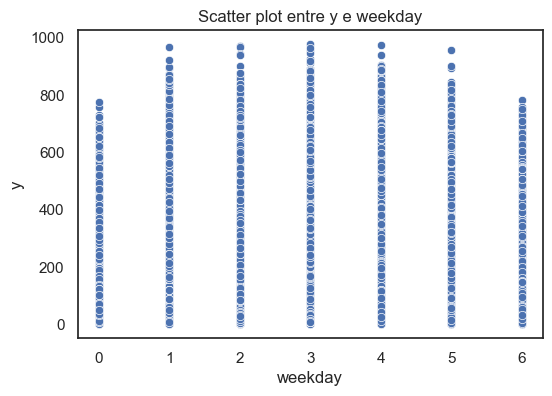

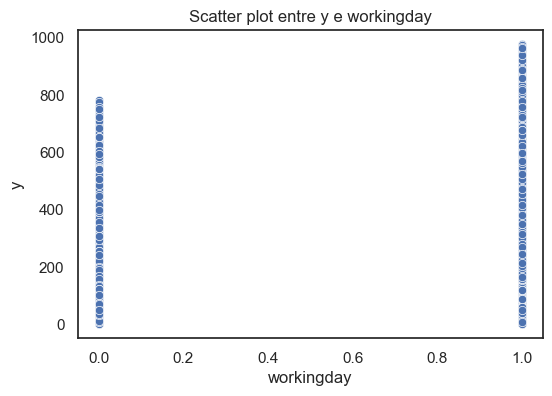

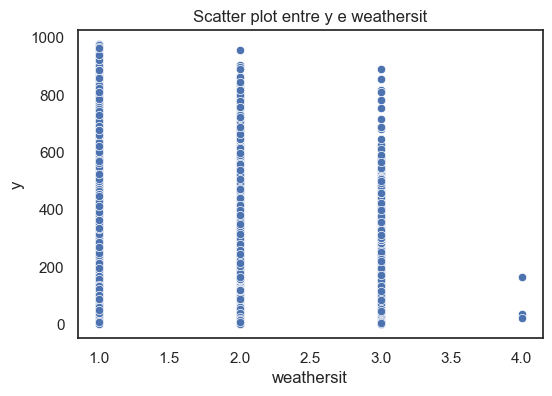

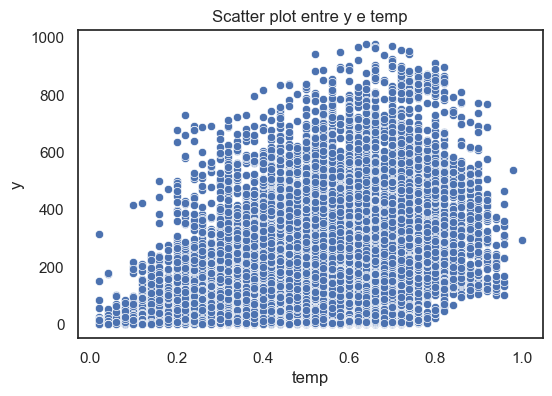

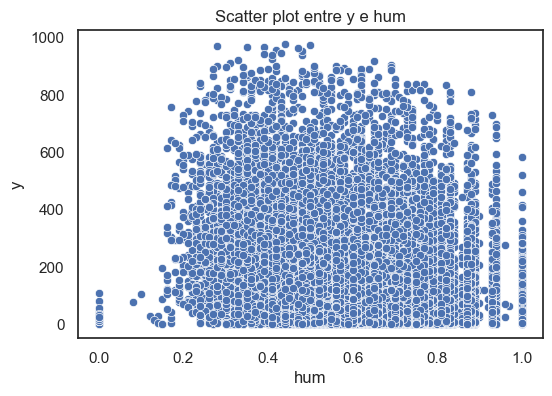

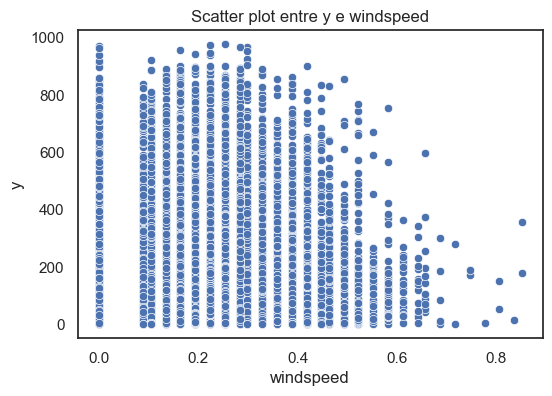

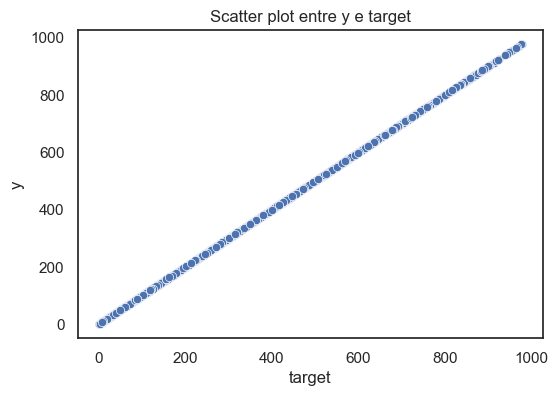

In [10]:
if isinstance(y, pd.DataFrame):
    y = y.squeeze()  

for coluna in X.columns:
    plt.figure(figsize=(6, 4))  
    sns.scatterplot(x=X[coluna], y=y) 
    plt.title(f'Scatter plot entre y e {coluna}')  
    plt.xlabel(coluna) 
    plt.ylabel('y')  
    plt.show()  

In [11]:
#Vou dropar mnth e vou fazer uma variavel de interacao entre hum e temp
#Vou dropar year tambem, nao ta fazendo sentindo manter
X["variavel_inter_temp"] = X["temp"] * X["hum"]
X.drop(columns=["yr","mnth", "target"], axis=1, inplace=True)
X.head()

,season,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,variavel_inter_temp
0,1,0,0,6,0,1,0.24,0.81,0.0,0.1944
1,1,1,0,6,0,1,0.22,0.80,0.0,0.1760
2,1,2,0,6,0,1,0.22,0.80,0.0,0.1760
3,1,3,0,6,0,1,0.24,0.75,0.0,0.1800
4,1,4,0,6,0,1,0.24,0.75,0.0,0.1800


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13903, 10), (3476, 10), (13903,), (3476,))

In [37]:
categorical_cols = ['season', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit',]
numerical_cols = ['temp', 'hum', 'windspeed','variavel_inter_temp']

# Aplicando OneHotEncoder nas variáveis categóricas
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoder.fit(X_train[categorical_cols]) 

X_train_categorical = encoder.transform(X_train[categorical_cols])
X_test_categorical = encoder.transform(X_test[categorical_cols])

X_train_categorical_df = pd.DataFrame(X_train_categorical, columns=encoder.get_feature_names_out(categorical_cols))
X_test_categorical_df = pd.DataFrame(X_test_categorical, columns=encoder.get_feature_names_out(categorical_cols))

# Aplicando MinMaxScaler nas variáveis numéricas
scaler = MinMaxScaler()
scaler.fit(X_train[numerical_cols]) 

X_train_numerical = scaler.transform(X_train[numerical_cols])
X_test_numerical = scaler.transform(X_test[numerical_cols])

X_train_numerical_df = pd.DataFrame(X_train_numerical, columns=numerical_cols)
X_test_numerical_df = pd.DataFrame(X_test_numerical, columns=numerical_cols)

X_train_processed = pd.concat([X_train_categorical_df.reset_index(drop=True), X_train_numerical_df.reset_index(drop=True)], axis=1)
X_test_processed = pd.concat([X_test_categorical_df.reset_index(drop=True), X_test_numerical_df.reset_index(drop=True)], axis=1)


In [15]:
model = LinearRegression()
model.fit(X_train_processed, y_train)

y_pred = model.predict(X_test_processed)

mse = round(mean_squared_error(y_test, y_pred), 2)
rmse = round(np.sqrt(mse),2)
mae = round(mean_absolute_error(y_test, y_pred),2)
r2 = round(r2_score(y_test, y_pred),2)
mape = round((np.mean(np.abs((y_test - y_pred) / (y_test + 1e-10))) * 100),2)


print(f"MAPE: {mape:.2f}%")
print(f"Mean Squared Error (MSE): {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R² Score: {r2}")

MAPE: 219.15%
Mean Squared Error (MSE): 11827.08
RMSE: 108.75
MAE: 77.17
R² Score: 0.63


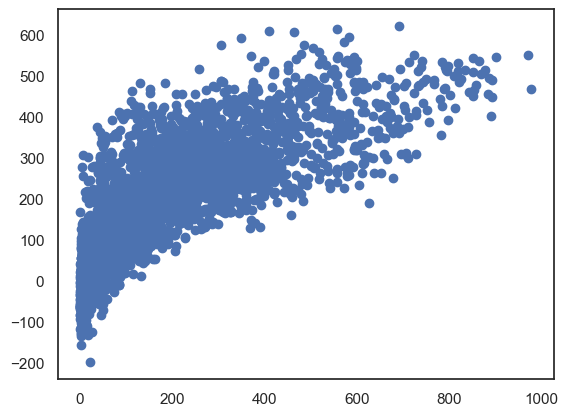

In [16]:
plt.scatter(y_test, y_pred)

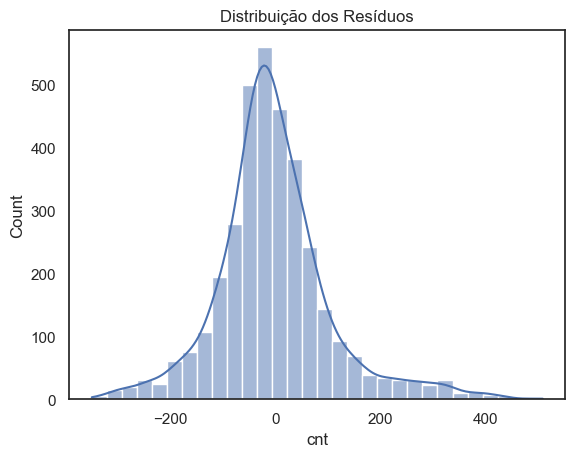

In [41]:
residuos = y_test - y_pred
sns.histplot(residuos, bins=30, kde=True)
plt.title("Distribuição dos Resíduos")
plt.show()

Eu fiz alguns testes tirando algumas variaveis e outras de interacao e não ficou bom. Talvez essa base precise de outro modelo, mas o foco aqui é regressão. Alguns pontos para prestar atencão:
1) Eu fiz todas os tratamentos possíveis nas features?
2) Os tratamentos que eu fiz, estão corretos?
3) Vale a pena normalizar todo mundo antes de fazer qualquer coisa?